In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [34]:
base_dir = 'All_Images'

In [36]:
#Use the flow_from_directory method to create training and validation generators. 
#Here, we split the dataset into 80% training and 20% validation.

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Set as training data
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    seed=42
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [38]:
test_generator = test_datagen.flow_from_directory(
    base_dir,  
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation purposes
)

Found 75000 images belonging to 5 classes.


In [42]:
#Create CNN
CNN= tf.keras.models.Sequential()

In [50]:

# First Convolutional Layer
CNN.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# First Pooling Layer
CNN.add(MaxPooling2D(pool_size=2, strides=2))

# Second Convolutional Layer
CNN.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Second Pooling Layer
CNN.add(MaxPooling2D(pool_size=2, strides=2))

# Third Convolutional Layer
CNN.add(Conv2D(filters=128, kernel_size=3, activation='relu'))

# Third Pooling Layer
CNN.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the layers
CNN.add(Flatten())

# Fully Connected Layer
CNN.add(Dense(units=128, activation='relu'))

# Dropout for regularization
CNN.add(Dropout(0.5))

# Output Layer
CNN.add(Dense(units=train_generator.num_classes, activation='softmax'))

In [52]:
# Compile the CNN
CNN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,297,573 (16.39 MB)

 Trainable params: 4,297,573 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# train the model using the training and validation sets.

training_test=CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=4
)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 752s 401ms/step - accuracy: 0.9691 - loss: 0.1015 - val_accuracy: 0.9835 - val_loss: 0.0512
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 785s 419ms/step - accuracy: 0.9710 - loss: 0.0977 - val_accuracy: 0.9653 - val_loss: 0.1073
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 789s 421ms/step - accuracy: 0.9780 - loss: 0.0735 - val_accuracy: 0.9789 - val_loss: 0.0664
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 856s 457ms/step - accuracy: 0.9776 - loss: 0.0747 - val_accuracy: 0.9677 - val_loss: 0.1066


In [75]:
test_loss, test_accuracy = CNN.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 268s 114ms/step - accuracy: 0.9127 - loss: 0.5355
Test Accuracy: 90.16%


In [83]:
CNN.save('my_model.keras')

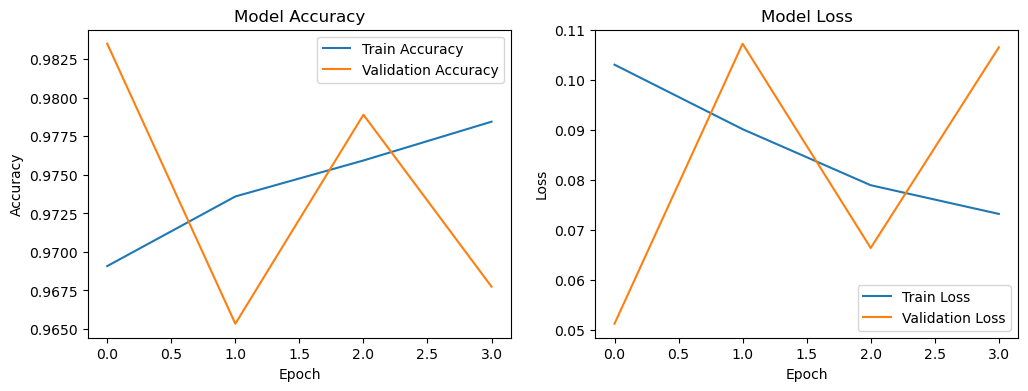

In [85]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_test.history['accuracy'], label='Train Accuracy')
plt.plot(training_test.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_test.history['loss'], label='Train Loss')
plt.plot(training_test.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()